In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from animation.plot_util import plot_var_interact, plot_std_interact

%matplotlib inline

In [49]:
# # jupyter lab 출력을 소수점 이하 3자리로 제한
# %precision 3

# dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision', 3)

np.set_printoptions(precision=3)

In [3]:
file = '../data/ch2_scores_em.csv'

In [4]:
df = pd.read_csv(file,
                index_col='student number')

In [5]:
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [6]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [7]:
scores_df = pd.DataFrame({'score':scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


# 2.1 데이터 중심의 지표

## 평균값 mean

In [8]:
np.mean(scores)

55.0

In [9]:
scores_df.mean()

score    55.0
dtype: float64

## 중앙값 median

In [10]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [11]:
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n+1)//2 - 1]
median

56.5

In [12]:
n

10

In [13]:
np.median(scores)

56.5

In [14]:
scores_df.median()

score    56.5
dtype: float64

## 최빈값 mode

In [15]:
pd.Series([1, 1, 1, 2, 2, 3]).mode()

0    1
dtype: int64

In [16]:
pd.Series([1, 2,3,4,5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

# 2.2 데이터의 산포도 지표

## 2.2.1 분산과 표준편차

### 편차 deviation

편차 = 값 - 평균

In [17]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [18]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [19]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [20]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

### 분산 variance

분산 = 편차*편차

분산에는 표본분산과 불편분산이 있다  
ddof = 0: 표본분산 : pandas 기본설정  
ddof = 1: 불편분산 : numpy 기본설정

In [21]:
# 표본분산 => 일반적인 분석
np.var(scores)

86.0

In [22]:
# 불편분산 => 10장에서 설명
scores_df.var()

score    95.556
dtype: float64

In [23]:
# 표본분산
scores_df.var(ddof=0)

score    86.0
dtype: float64

In [24]:
# 불편분산
scores_df.var(ddof=1)

score    95.556
dtype: float64

In [25]:
# 편차제곱 열을 추가
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


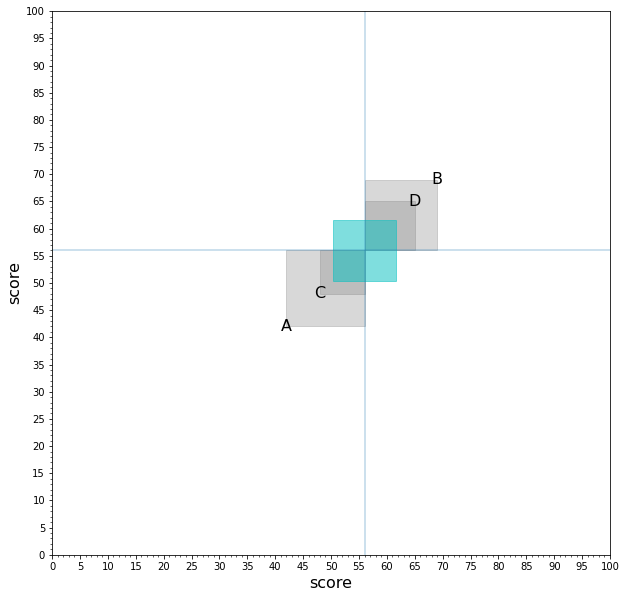

In [26]:
# score 4개를 하드코딩으로 박아둠
plot_var_interact(scores)

### 표준편차 standard deviation

표준편차 = 분산의 제곱근

1시그마 구간 = 평균 +- 표준편차  
2시그마 구간 = 평균 +- 2표준편차  
3시그마 구간 = 평균 +- 3표준편차

In [27]:
np.sqrt(np.var(scores, ddof=0)) #표본분산

9.273618495495704

In [28]:
np.std(scores, ddof=0)

9.273618495495704

In [29]:
# plot_std_interact(scores[:3]) #역시나 10개 하드코딩

## 2.2.2 범위와 사분위 범위

### 범위range

범위 = 최댓값 - 최솟값

In [30]:
np.max(scores) - np.min(scores)

28

### 사분위 범위

Q1 = 하위 25% = 제1사분위수  
Q2 = 하위 50% = 제2사분위수  
Q3 = 하위 75% = 제3사분위수  

사분위 범위 = IQR = Q3 - Q1

In [31]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

## 2.2.3 데이터의 지표정리

다 필요없고 이 함수면 다 보여줌

In [32]:
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

# 2.3 데이터의 정규화 normalization

정규화 = 데이터를 통일된 지표로 전환

## 2.3.1 표준화 standardization

표준화 = (데이터 - 평균) / 표준편차 = z-score

표준화된 데이터는 평균이 0, 표준편차가 1이다

In [33]:
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [34]:
np.mean(scores)

55.0

In [50]:
np.std(scores)

9.273618495495704

In [47]:
(np.array(scores) - np.mean(scores)) / np.std(scores)

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [37]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

안만들어지잖아~~~

In [43]:
np.mean(z), np.std(z)

(-1.6653345369377347e-17, 0.9999999999999999)

In [39]:
pd.Series(z).mean()

-1.6653345369377347e-17

In [40]:
a = [1,2,3,4,5]

In [41]:
b = np.array(a)

In [42]:
np.mean((b - np.mean(b)) / np.std(b))

0.0

### 편찻값 deviation value

편찻값  
= 평균이 50, 표준편차가 10이 되도록 정규화한 값  
= 50 + 10 * z-score

-1 ~ 1 로 표현되는 것보다 사람이 알아보기는 쉬워진다

In [54]:
dv = 50 + 10*z
dv

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [56]:
scores_df['deviation value'] = dv
scores_df

,score,deviation value
student,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


# 2.4 1차원 데이터의 시각화 

In [57]:
# 50명의 영어 점수 array
english_scores = np.array(df['english'])
# Series로 변환하여 describe를 표시
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

## 2.4.1 도수분포표 frequency distirbution table

계급 class: 구간  

도수 frequency: 구간 내 값의 개수  

계급폭 range: 구간의 폭   

계급수 bins: 계급의 개수

계급값 class value = 계급의 중앙값

상대도수 relative frequency: 도수 / 전체 도수 합

누적상대도수 cum relative frequency: 상대도수의 누적합

최빈값은 도수분포표를 만드는 방법에 따라 달라진다

In [58]:
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [59]:
# 0~10, 10~20, ... 이라는 문자열의 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]

# freq_class를 인덱스로 DataFrame을 작성: df로 도수분포표 그리기
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index=pd.Index(freq_class,
                                           name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [60]:
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [61]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [62]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [63]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency',
                             'relative frequency', 'cumulative relative frequency']]

freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


## 2.4.2 히스토그램 histogram

도수분포표를 막대그래프로 나타낸 것

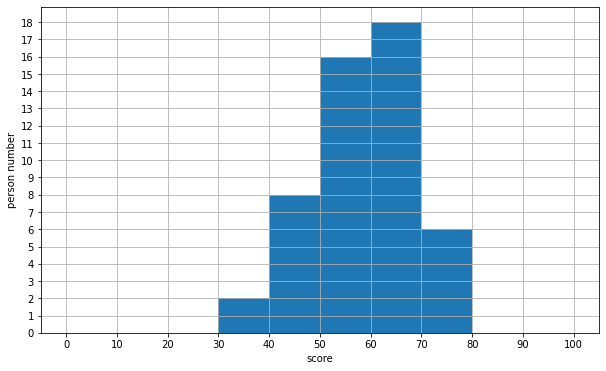

In [65]:
# 캔버스를 생성
fig = plt.figure(figsize=(10, 6)) # figsize로 가로・세로 크기를 지정
# 켄버스 위에 그래프를 그리기 위한 영역을 지정
ax = fig.add_subplot(111) # 인수는 영역을 1×1개 지정、하나의 영역에 그린다는 것을 의미

# 계급수를 10으로 하여 히스토그램을 그림
freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))
# X축에 레이블 부여
ax.set_xlabel('score')
# Y축에 레이블 부여
ax.set_ylabel('person number')
# X축을 0, 10, 20, ..., 100 눈금으로 구분
ax.set_xticks(np.linspace(0, 100, 10+1))
# Y축을 0, 1, 2, ...의 눈금으로 구분
ax.set_yticks(np.arange(0, freq.max()+1))
# grid 표시
plt.grid()
# 그래프 표시
plt.show()

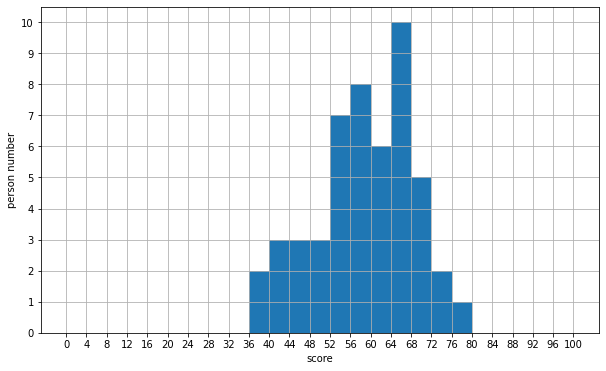

In [67]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# 계급(구간)수를 25개로 증가
freq, _ , _ = ax.hist(english_scores, bins=25, range=(0, 100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.grid()
plt.show()

In [69]:
english_scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66])

In [71]:
np.ones_like(english_scores) / len(english_scores)

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02])

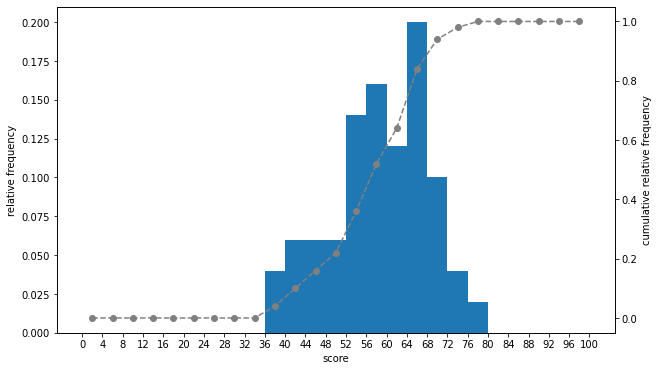

In [90]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터의 수로 나눌 필요가 있음
# 이것은 hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25,
                          range=(0, 100), weights=weights) # 이 모양 뭔지 제니에게 질문

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]
# 꺾은선 그래프를 그림
# 인수 ls를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o'으로 하면 데이터 점을 그람
# 인수 color를 'gray'로 하면 회색으로 지정
ax2.plot(class_value, cum_rel_freq,
         ls='--', marker='o', color='gray')
# 꺾은선 그래프의 눈금선을 제거
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1)) #? 25+1 뭐야

plt.show()

## 2.4.3 상자그림 box plot

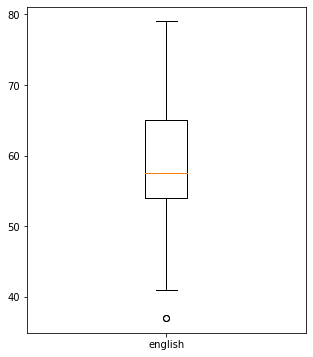

In [91]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])

plt.show()